In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("D:/Insurance_AI_project/datasets/customer_data.csv")

In [3]:
df.head()

,Customer_ID,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,CUST0001,56,148707.00,1,7013.17,3,0
1,CUST0002,69,38210.92,5,5154.46,0,0
2,CUST0003,46,87382.85,5,18636.76,6,4
3,CUST0004,32,134058.50,3,2563.76,1,4
4,CUST0005,60,116299.92,1,14130.32,1,1


In [4]:
# Drop Customer_ID as it's not useful for clustering
df = df.drop(columns=["Customer_ID"])

C:\Users\naveen\AppData\Local\Temp\ipykernel_12940\2715296269.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Policy_Count'], palette='Set2')


Text(0.5, 1.0, 'Policy Count - Frequency')

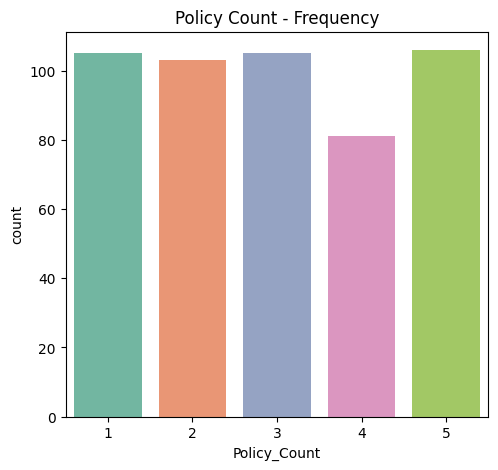

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=df['Policy_Count'], palette='Set2')
plt.title('Policy Count - Frequency')

Text(0.5, 1.0, 'Claim Frequency - Distribution')

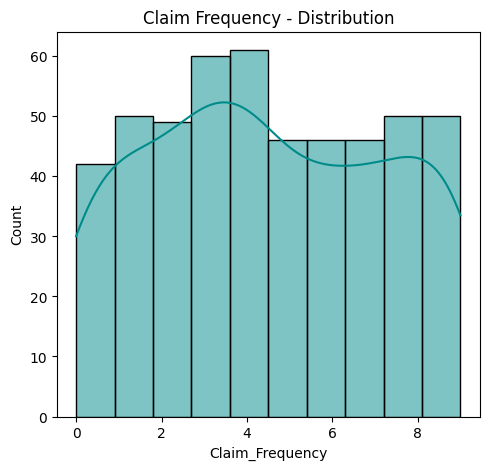

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Claim_Frequency'], kde=True, color='darkcyan')
plt.title('Claim Frequency - Distribution')

C:\Users\naveen\AppData\Local\Temp\ipykernel_12940\2533103572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Policy_Upgrades'], palette='coolwarm')


Text(0.5, 1.0, 'Policy Upgrades - Frequency')

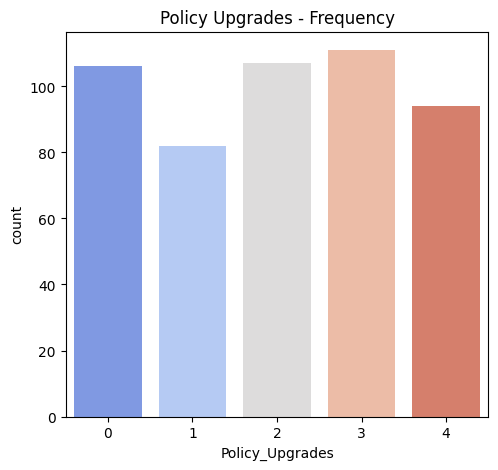

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=df['Policy_Upgrades'], palette='coolwarm')
plt.title('Policy Upgrades - Frequency')

C:\Users\naveen\AppData\Local\Temp\ipykernel_12940\2789401721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Policy_Count', y='Claim_Frequency', data=df, palette='Set3')


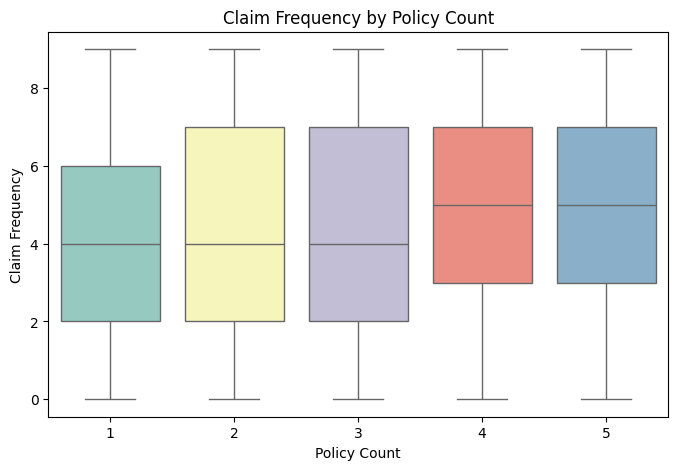

In [10]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Policy_Count', y='Claim_Frequency', data=df, palette='Set3')
plt.title('Claim Frequency by Policy Count')
plt.xlabel('Policy Count')
plt.ylabel('Claim Frequency')
plt.show()


C:\Users\naveen\AppData\Local\Temp\ipykernel_12940\3578459931.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Policy_Count', y='Policy_Upgrades', data=mean_upgrades, palette='coolwarm')


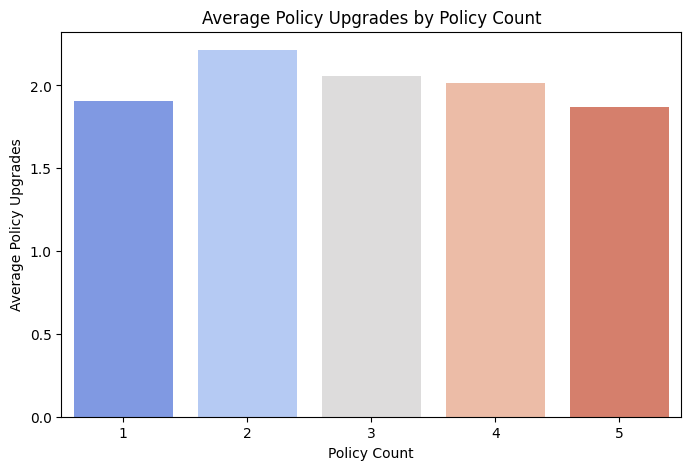

In [11]:
mean_upgrades = df.groupby('Policy_Count')['Policy_Upgrades'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x='Policy_Count', y='Policy_Upgrades', data=mean_upgrades, palette='coolwarm')
plt.title('Average Policy Upgrades by Policy Count')
plt.xlabel('Policy Count')
plt.ylabel('Average Policy Upgrades')
plt.show()


In [135]:
# Feature Scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [136]:
pd.DataFrame(df_scaled, columns=df.columns).head()


,Age,Annual_Income,Policy_Count,Total_Premium_Paid,Claim_Frequency,Policy_Upgrades
0,0.334548,1.678521,-1.367457,-0.588088,-0.533879,-1.426321
1,1.048689,-1.219055,1.423271,-0.927022,-1.601636,-1.426321
2,-0.214792,0.070397,1.423271,1.531462,0.533879,1.412129
3,-0.983867,1.294388,0.027907,-1.399434,-1.245717,1.412129
4,0.554284,0.828699,-1.367457,0.709717,-1.245717,-0.716709


In [137]:
# Save Scaler
with open("scaler_segment.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [138]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [139]:
# Save PCA Model
with open("pca_segment.pkl", "wb") as f:
    pickle.dump(pca, f)

In [140]:
df_pca_df = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca_df.head()

,PC1,PC2
0,-0.594220,-0.909539
1,0.422433,1.439758
2,0.673263,0.793659
3,-0.857280,-1.865327
4,-1.526697,0.384741


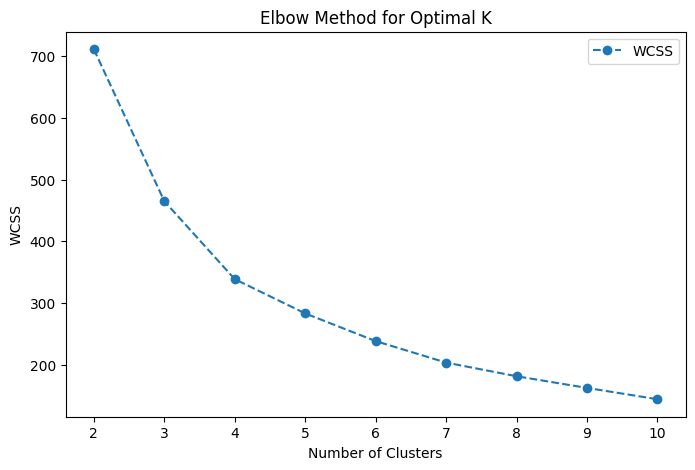

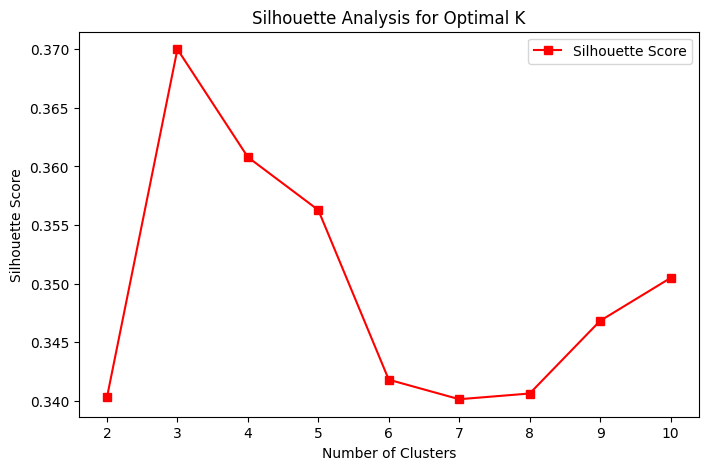

In [141]:
# Elbow Method to determine optimal K for K-Means
wcss = []
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca, labels))

plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--', label='WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', color='red', label='Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.legend()
plt.show()

In [142]:
# K-Means Clustering
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_pca)

# Add cluster labels to the dataset
df["KMeans_Cluster"] = kmeans_labels



# Save K-Means Model
with open("kmeans_segment.pkl", "wb") as f:
    pickle.dump(kmeans, f)
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_pca)

# Save DBSCAN Model
with open("dbscan_segment.pkl", "wb") as f:
    pickle.dump(dbscan, f)

# Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(df_pca)

# Save Hierarchical Model
with open("hierarchical_segment.pkl", "wb") as f:
    pickle.dump(agglo, f)

In [143]:
# Evaluate Clustering Performance
def evaluate_clustering(labels, name):
    if len(set(labels)) > 1:  # Ensure at least 2 clusters
        silhouette = silhouette_score(df_pca, labels)
        db_index = davies_bouldin_score(df_pca, labels)
        print(f"{name}: Silhouette Score = {silhouette:.4f}, Davies-Bouldin Index = {db_index:.4f}")
    else:
        print(f"{name}: Clustering resulted in only one cluster, not evaluable.")

evaluate_clustering(kmeans_labels, "K-Means Segment")
evaluate_clustering(dbscan_labels, "DBSCAN Segment")
evaluate_clustering(agglo_labels, "Hierarchical Segment")


K-Means Segment: Silhouette Score = 0.3608, Davies-Bouldin Index = 0.8610
DBSCAN Segment: Silhouette Score = 0.3554, Davies-Bouldin Index = 5.8332
Hierarchical Segment: Silhouette Score = 0.3284, Davies-Bouldin Index = 0.9342


In [144]:
# Add cluster labels to the original dataset
df["KMeans_Cluster"] = kmeans_labels
df["DBSCAN_Cluster"] = dbscan_labels
df["Agglo_Cluster"] = agglo_labels

# Select only numeric columns
numeric_cols = df.select_dtypes(include=["number"])

# Analyze cluster characteristics
kmeans_summary = numeric_cols.groupby(df["KMeans_Cluster"]).mean()
dbscan_summary = numeric_cols.groupby(df["DBSCAN_Cluster"]).mean()
agglo_summary = numeric_cols.groupby(df["Agglo_Cluster"]).mean()

print("K-Means Cluster Summary:\n", kmeans_summary)
print("\nDBSCAN Cluster Summary:\n", dbscan_summary)
print("\nHierarchical Cluster Summary:\n", agglo_summary)


K-Means Cluster Summary:
                       Age  Annual_Income  Policy_Count  Total_Premium_Paid  \
KMeans_Cluster                                                               
0               46.245614   99729.646316      4.096491         7309.919561   
1               33.785714   99611.170612      2.010204         6426.566939   
2               63.459854   69872.126277      3.817518        13301.352336   
3               50.847682   77123.235497      1.940397        12143.711258   

                Claim_Frequency  Policy_Upgrades  KMeans_Cluster  \
KMeans_Cluster                                                     
0                      6.991228         1.833333             0.0   
1                      4.346939         2.316327             1.0   
2                      4.635036         1.656934             2.0   
3                      2.596026         2.264901             3.0   

                DBSCAN_Cluster  Agglo_Cluster  
KMeans_Cluster                                 


In [145]:
# Assigning Labels Based on Cluster Characteristics
def assign_kmeans_segment(label):
    cluster_labels = {
        0: "High-Value, High-Claim Customers",
        1: "Young and Growing Customers",
        2: "Senior Customers with High Premiums",
        3: "Low Engagement, Low-Risk Customers"
    }
    return cluster_labels.get(label, "Unknown")

df["KMeans_Segment_Label"] = df["KMeans_Cluster"].apply(assign_kmeans_segment)




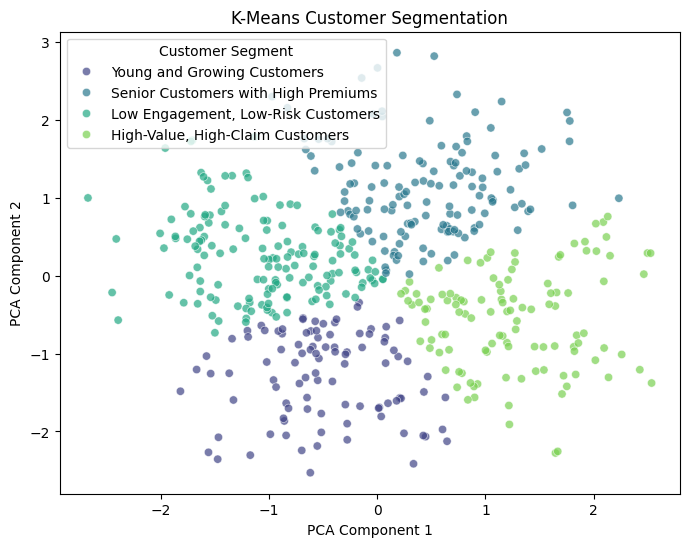

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assign meaningful labels to clusters
cluster_labels = {
    0: "High-Value, High-Claim Customers",
    1: "Young and Growing Customers",
    2: "Senior Customers with High Premiums",
    3: "Low Engagement, Low-Risk Customers"
}

# Convert numeric cluster labels to named labels
df["KMeans_Segment_Label"] = df["KMeans_Cluster"].map(cluster_labels)

# Scatter plot of K-Means clusters with labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df["KMeans_Segment_Label"], palette="viridis", alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("K-Means Customer Segmentation")
plt.legend(title="Customer Segment")
plt.show()


In [148]:
# Save final dataset with segment labels
df.to_csv("customer_segments.csv", index=False)
print("\nFinal dataset with customer segments saved as customer_segments.csv ✅")


Final dataset with customer segments saved as customer_segments.csv ✅
